# PUNTAJE PROMEDIO DE LOS ESTUDIANTES (Califiación)

Librerias

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

Carga y lectura

In [5]:
df=pd.read_csv("/home/pedrin/Escritorio/Proyecto/prediccion/data/scores.csv") #cargamos el archivo
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


# Significado de cada una de las columnas

- **school:** el nombre de la escuela
- **school setting:** la localización de la escuela
- **school type:** si la escuela es pública o no pública
- **classroom:** el tipo de aula
- **teaching method:** si es tradicional o experimental
- **n students:** el número de estudiantes del aula
- **student id:** identificador único del alumno
- **gender:** género del alumno
- **lunch:** si el estudiante califica a un almuerzo o no
- **pretest:** calificación previa
- **posttest:** calificación posterior


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


Algunas distribuciones de datos

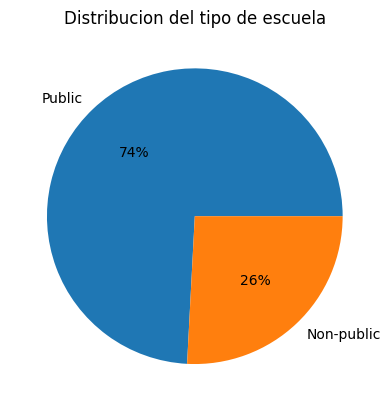

In [7]:
sch_type=df["school_type"].value_counts() #escuela publica vs privada
plt.pie(sch_type, labels=sch_type.index, autopct='%.0f%%')
plt.title("Distribucion del tipo de escuela")
plt.show()

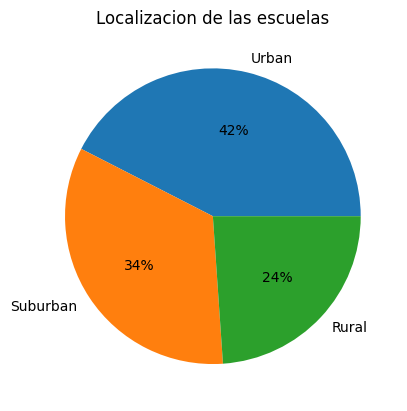

In [8]:
sch_set = df['school_setting'].value_counts() #lugar en donde se encuentran las escuelas

plt.pie(sch_set, labels=sch_set.index, autopct='%.0f%%')
plt.title("Localizacion de las escuelas")
plt.show()

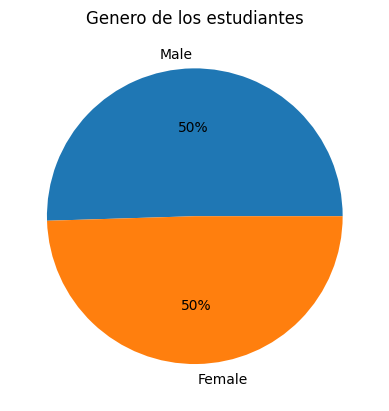

In [9]:
gender = df['gender'].value_counts() #genero de los estudiantes

plt.pie(gender, labels=gender.index, autopct='%.00f%%')
plt.title("Genero de los estudiantes")
plt.show()

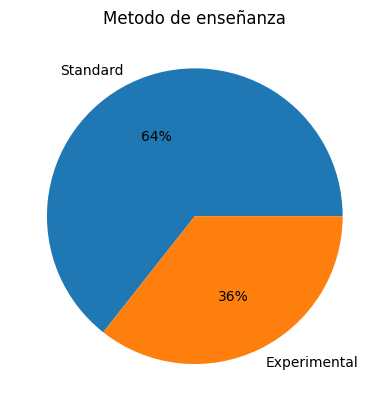

In [10]:
teach = df['teaching_method'].value_counts() #como enseña en las escuelas

plt.pie(teach, labels=teach.index, autopct='%.0f%%')
plt.title("Metodo de enseñanza")
plt.show()

# Preproceso

Datos nulos

In [11]:
df.isnull().sum() #no hay valores nulos o faltantes

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

Agregamos una columna nueva para el promedio del test previo y posterior

In [12]:
df["mean_score"]= ((df["pretest"]+ df["posttest"])/2).round()  #nueva columna para el promedio
df = df.set_index('student_id') #ahora el identificador del estudiante es el indice del data frame
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest,mean_score
student_id,,,,,,,,,,,
2FHT3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0,67.0
3JIVH,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0,72.0
3XOWE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0
556O0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0,69.0
74LOE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0


In [13]:
replace = df.select_dtypes(exclude=['int','float']) #seleccionamos columas excluyendo aquellas que son int o float
replace.copy() #hacemos una copia para no afectar el df original

,school,school_setting,school_type,classroom,teaching_method,gender,lunch
student_id,,,,,,,
2FHT3,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
3JIVH,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
3XOWE,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify
556O0,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
74LOE,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify
...,...,...,...,...,...,...,...
T8LSK,ZOWMK,Urban,Public,ZBH,Standard,Female,Does not qualify
VNP26,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch
YDR1Z,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch


In [14]:

#school setting: 0 urban, 1 suburban, 2 rural
#school type: 0 non public, 1 public
#teaching method: 0 standard, 1 experimental
#gender: 0 female, 1 male
#lunch: 0 doesnt qualify, 1 qualifies for lunch

#asi quedan las columnas ahoar con valores numericos

In [15]:

le = LabelEncoder() #convertimos clumnas categoricas en numericas

for col in replace.columns:
    replace[col] = le.fit_transform(replace[col])

In [16]:
num_col = df.select_dtypes(exclude ='object')
final_df = replace.join(num_col) #actualizar el df 
final_df



,school,school_setting,school_type,classroom,teaching_method,gender,lunch,n_student,pretest,posttest,mean_score
student_id,,,,,,,,,,,
2FHT3,0,2,0,22,1,0,0,20.0,62.0,72.0,67.0
3JIVH,0,2,0,22,1,0,0,20.0,66.0,79.0,72.0
3XOWE,0,2,0,22,1,1,0,20.0,64.0,76.0,70.0
556O0,0,2,0,22,1,0,0,20.0,61.0,77.0,69.0
74LOE,0,2,0,22,1,1,0,20.0,64.0,76.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
T8LSK,22,2,1,94,1,0,0,30.0,39.0,55.0,47.0
VNP26,22,2,1,94,1,0,1,30.0,38.0,46.0,42.0
YDR1Z,22,2,1,94,1,0,1,30.0,45.0,51.0,48.0


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2133 entries, 2FHT3 to ZVCQ8
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   int64  
 1   school_setting   2133 non-null   int64  
 2   school_type      2133 non-null   int64  
 3   classroom        2133 non-null   int64  
 4   teaching_method  2133 non-null   int64  
 5   gender           2133 non-null   int64  
 6   lunch            2133 non-null   int64  
 7   n_student        2133 non-null   float64
 8   pretest          2133 non-null   float64
 9   posttest         2133 non-null   float64
 10  mean_score       2133 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 264.5+ KB


Observamos las relaciones

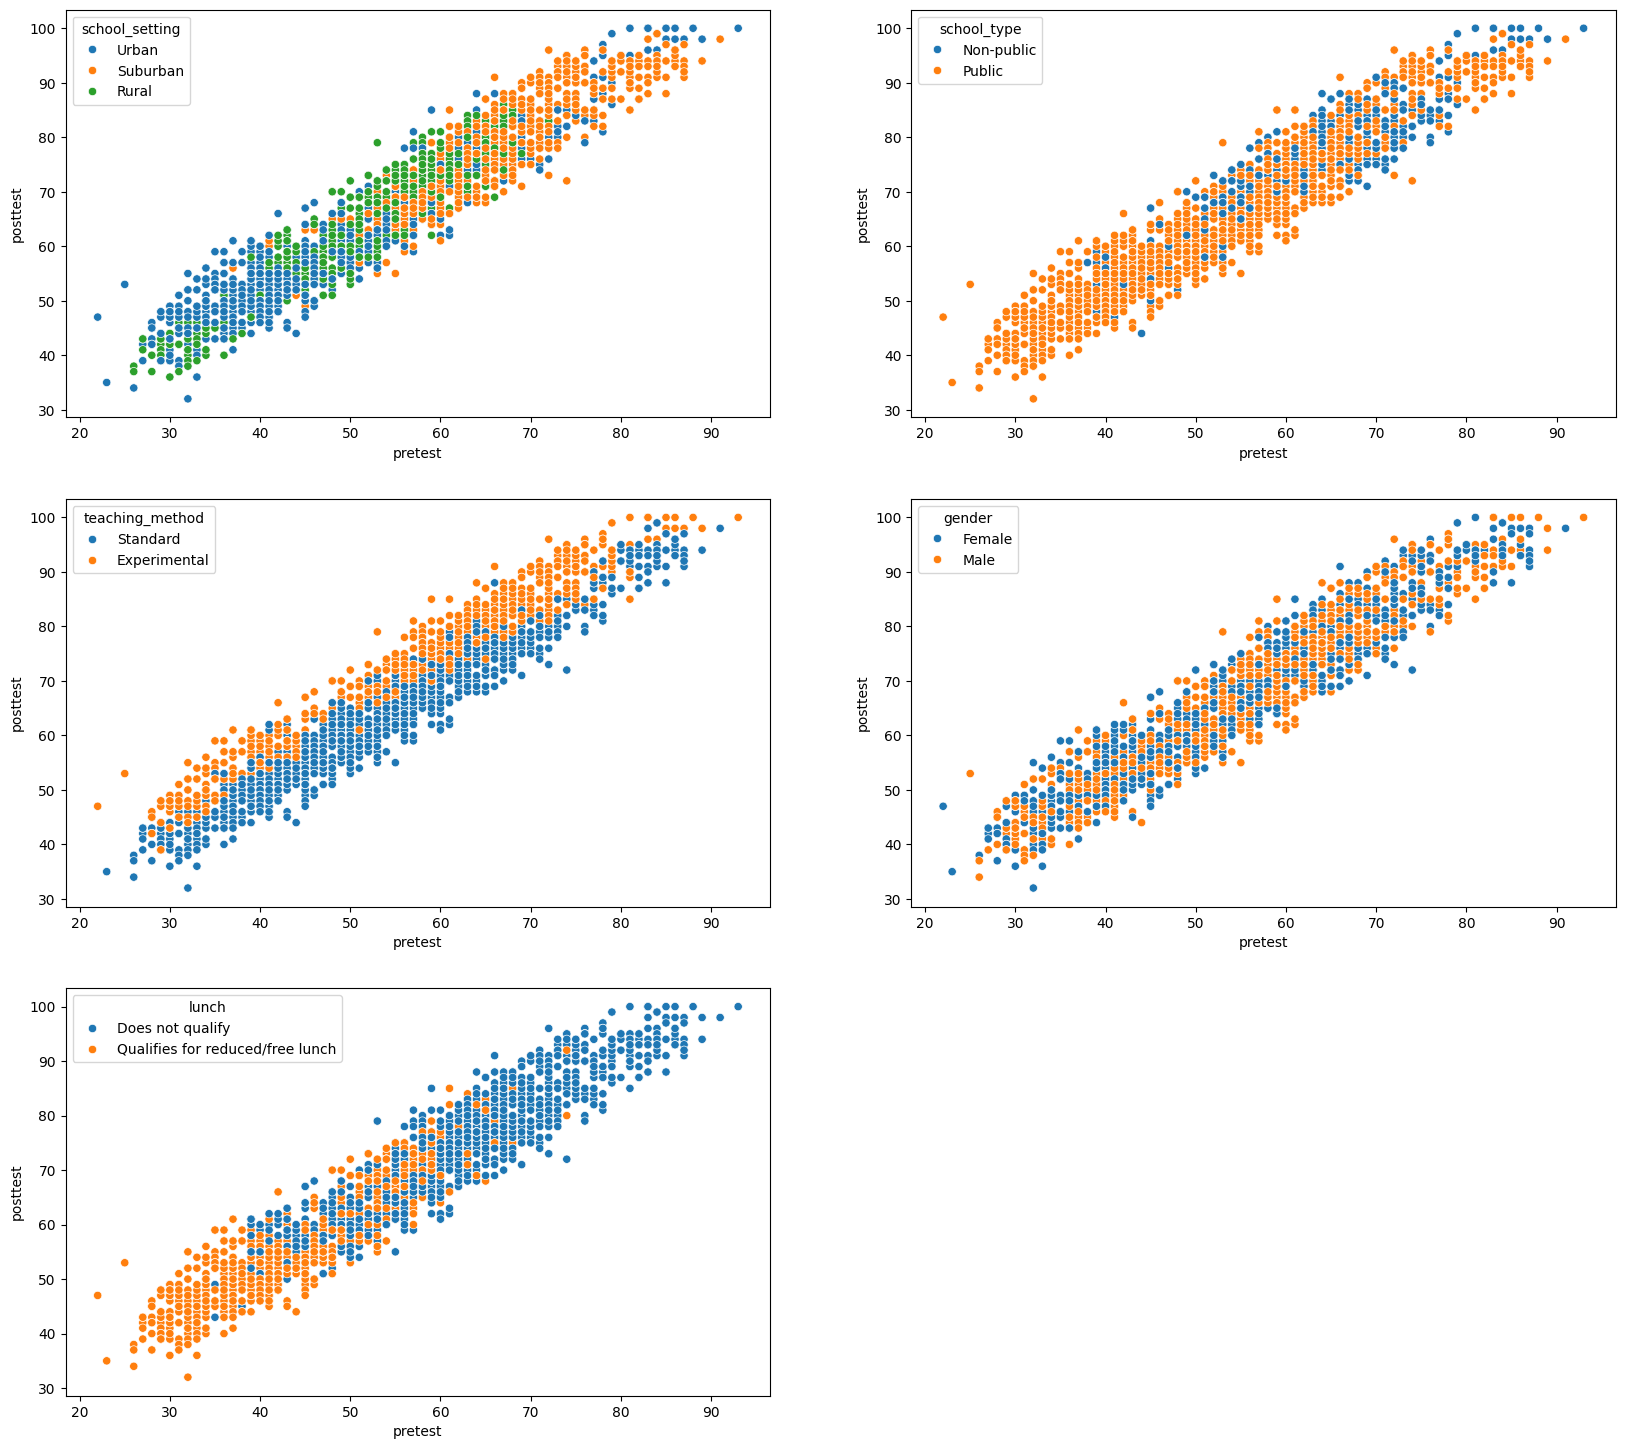

In [18]:


categorial_var = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

fig, ax = plt.subplots(figsize=(20,18), nrows=3, ncols=2)

for c, axis in zip(categorial_var[1:], ax.ravel()):
    sns.scatterplot(data=df,x="pretest", y="posttest",hue=c,ax=axis)
    
ax[2][1].set_visible(False)

In [19]:
final_df = final_df.drop(columns=['classroom']) #la columna classroom es irrelevante


Seleccion de caracteristicas

In [20]:
X = final_df.iloc[:,1:7] #datos de entrada
y = final_df['mean_score'] #datos de salida

In [21]:
X #como se ven los datos de entrada

,school_setting,school_type,teaching_method,gender,lunch,n_student
student_id,,,,,,
2FHT3,2,0,1,0,0,20.0
3JIVH,2,0,1,0,0,20.0
3XOWE,2,0,1,1,0,20.0
556O0,2,0,1,0,0,20.0
74LOE,2,0,1,1,0,20.0
...,...,...,...,...,...,...
T8LSK,2,1,1,0,0,30.0
VNP26,2,1,1,0,1,30.0
YDR1Z,2,1,1,0,1,30.0


In [22]:
y_df=pd.DataFrame(y)
y_df #como se ven datos de salida

,mean_score
student_id,
2FHT3,67.0
3JIVH,72.0
3XOWE,70.0
556O0,69.0
74LOE,70.0
...,...
T8LSK,47.0
VNP26,42.0
YDR1Z,48.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) 
#split de los datos, 80 de train || 20 de test

## Con regresion Lineal

In [24]:
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred_LR_test = LR_model.predict(X_test) #test
r2_LR_test = r2_score(y_test,y_pred_LR_test)
mae_LR_test = mean_absolute_error(y_test, y_pred_LR_test)

print("metricas del conjunto de test")
print("r2", r2_LR_test)
print("error absoluto medio:", mae_LR_test)

metricas del conjunto de test
r2 0.4858652246085877
error absoluto medio: 7.984508662425269


## Con arboles de decision

In [26]:

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:

y_pred_DT_test = DT_model.predict(X_test) #test
r2_DT_test=r2_score(y_test,y_pred_DT_test)
mae_DT_test = mean_absolute_error(y_test, y_pred_DT_test)

print("metricas del conjunto de test:")
print("r2", r2_DT_test)
print("error absoluto medio:", mae_DT_test)

metricas del conjunto de test:
r2 0.864547343302799
error absoluto medio: 3.6210808505886987


## Validacion cruzada 

Arboles de decision

In [28]:
model = DecisionTreeRegressor()
kfold_validation = KFold(10)

results = cross_val_score(model,X_train,y_train,cv = kfold_validation)
print(results,"\n")

print("media: ", np.mean(results))


#DT tiene mejor validacion

[0.88616193 0.86723124 0.86929449 0.84678349 0.81687664 0.88357311
 0.86113117 0.87808968 0.81706406 0.86979597] 

media:  0.8596001787605326


Ahora con regresion lineal

In [29]:
model = LinearRegression()
kfold_validation = KFold(10)

results = cross_val_score(model,X_train,y_train,cv = kfold_validation)
print(results,"\n")

print("media: ",np.mean(results))

#a la LR no le va muy bien en la validacion

[0.4183407  0.55154845 0.52317807 0.50075437 0.49249189 0.51462289
 0.50345237 0.57572915 0.51636051 0.56185782] 

media:  0.5158336201742992


# Test

Regresion lineal

In [30]:
new_alu_LR = {
    'school_setting': 0,  #urbana
    'school_type': 1,   #publica
    'teaching_method': 0,  #standard
    'gender': 0,  #femenina
    'lunch': 1,  #si
    'n_student': 8  #compañeros
}


new_alu_LR_df = pd.DataFrame([new_alu_LR])


predicted_mean_score = LR_model.predict(new_alu_LR_df)

print("el promedio es :", predicted_mean_score)
new_alu_LR_df


el promedio es : [66.55967389]


,school_setting,school_type,teaching_method,gender,lunch,n_student
0,0,1,0,0,1,8


Arboles de decision

In [31]:

new_alu_DT = {
    'school_setting': 0,  #urbana
    'school_type': 1,   #publica
    'teaching_method': 0, #standard
    'gender': 0,  #mujer
    'lunch': 1,  #si
    'n_student': 8   #compañeros
}


new_alu_DT_df = pd.DataFrame([new_alu_DT])

predicted_mean_score = DT_model.predict(new_alu_DT_df)

print("el promedio es :", predicted_mean_score)
new_alu_DT_df





el promedio es : [64.]


,school_setting,school_type,teaching_method,gender,lunch,n_student
0,0,1,0,0,1,8


# Comparaciones

In [32]:
metricas = {
    "Modelo": ["Regresion lineal",  "Arbole de decision"],
    "R2": [ r2_LR_test, r2_DT_test],
    "MAE": [mae_LR_test,  mae_DT_test]
}

df_metricas = pd.DataFrame(metricas)
df_metricas

,Modelo,R2,MAE
0,Regresion lineal,0.485865,7.984509
1,Arbole de decision,0.864547,3.621081
